### Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

In [21]:
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

In [275]:
default = pd.read_csv('data/credit.csv', index_col=0)

In [7]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [10]:
default.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

##### Plotting in 3D

Below, example plots are made with both `matplotlib` and with `plotly` to demonstrate how to construct three dimensional plots.  

`matplotlib`

In `matplotlib` an `axes` object is created where the projection is specified as '3d'.  Then, the `axes` are use to plot a 3D object on.  Below, a scatter plot is built, but there are many 3D objects that can be created in addition to points.  For more information see the documentation on 3D plotting [here](https://matplotlib.org/stable/api/toolkits/mplot3d.html?highlight=3d).


`plotly`

Use the `scatter_3d` function directly.

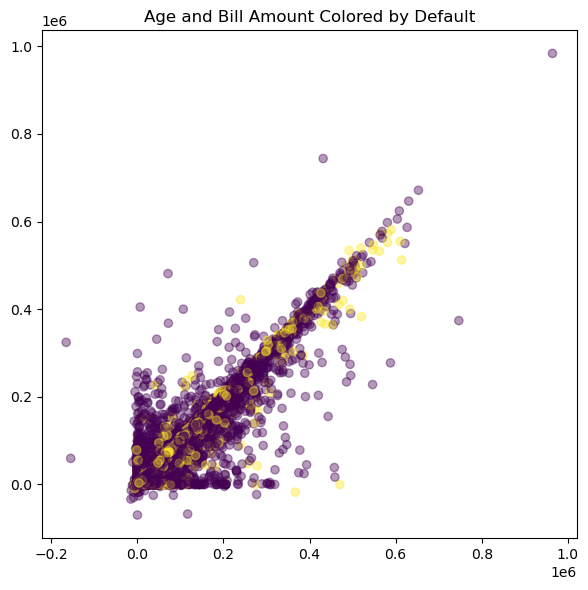

In [276]:
plt.figure(figsize = (6,6))
plt.scatter(default['BILL_AMT1'], default['BILL_AMT2'], c = default['default.payment.next.month'], alpha = 0.4)
#ax.set_xlabel('AGE', labelpad = 20)
#ax.set_ylabel('Bill 1 Amount', labelpad = 20)
#ax.set_zlabel('Bill 2 Amount', labelpad = 20)
#ax.view_init(10, 60)
plt.title('Age and Bill Amount Colored by Default')
plt.tight_layout();

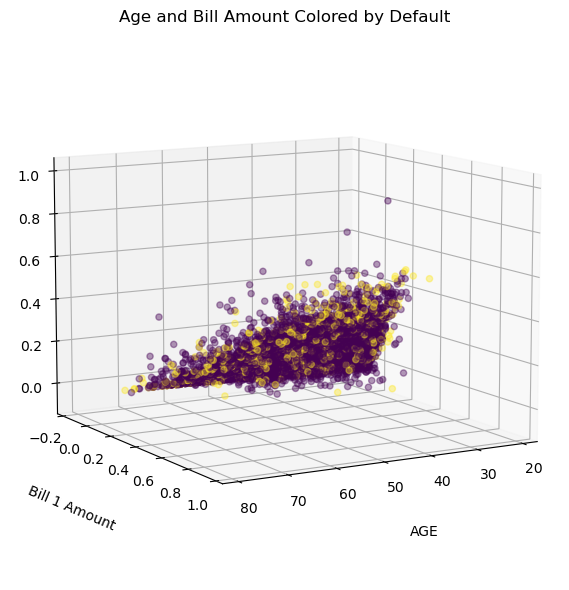

In [278]:
plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(default['AGE'], default['BILL_AMT1'], default['BILL_AMT2'], c = default['default.payment.next.month'], alpha = 0.4)
ax.set_xlabel('AGE', labelpad = 20)
ax.set_ylabel('Bill 1 Amount', labelpad = 20)
ax.set_zlabel('Bill 2 Amount', labelpad = 20)
ax.view_init(10, 60)
plt.title('Age and Bill Amount Colored by Default')
plt.tight_layout();

In [351]:
#drop categorical variables
colstodrop = ['SEX', 'EDUCATION', 'MARRIAGE','default.payment.next.month']
default_adjusted = default.drop(colstodrop, axis=1)


In [280]:
default_adjusted.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [307]:

#Scaled data
X= StandardScaler().fit_transform(default_adjusted)
working_df= pd.DataFrame(data=X, columns=default_adjusted.columns)
working_df

LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
ID                                                                             
1      -1.136701 -1.245999  1.794534  1.782318 -0.696652 -0.666588 -1.530021   
2      -0.365974 -1.029030 -0.874977  1.782318  0.138862  0.188743  0.234913   
3      -0.597192 -0.161154  0.014860  0.111734  0.138862  0.188743  0.234913   
4      -0.905483  0.164300  0.014860  0.111734  0.138862  0.188743  0.234913   
5      -0.905483  2.333990 -0.874977  0.111734 -0.696652  0.188743  0.234913   
...          ...       ...       ...       ...       ...       ...       ...   
29996   0.404752  0.381269  0.014860  0.111734  0.138862  0.188743  0.234913   
29997  -0.134756  0.815207 -0.874977 -0.723558 -0.696652 -0.666588  0.234913   
29998  -1.059629  0.164300  3.574208  2.617611  1.809891 -0.666588  0.234913   
29999  -0.674265  0.598238  0.904697 -0.723558  0.138862  0.188743  0.234913   
30000  -0.905483  1.140661  0.014860  0.111734  0.138862  0.188743  0.234913   

          PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                       
1     -1.486016  -0.642490  -0.647388  -0.667982  -0.672486  -0.663047   
2      1.992282  -0.659208  -0.666735  -0.639244  -0.621626  -0.606219   
3      0.253133  -0.298555  -0.493891  -0.482400  -0.449723  -0.417181   
4      0.253133  -0.057490  -0.013292   0.032846  -0.232369  -0.186726   
5      0.253133  -0.578608  -0.611308  -0.161186  -0.346991  -0.348131   
...         ...        ...        ...        ...        ...        ...   
29996  0.253133   1.870348   2.018102   2.326651   0.695462  -0.149257   
29997  0.253133  -0.672775  -0.665288  -0.627419  -0.532915  -0.577682   
29998  0.253133  -0.647216  -0.643820  -0.638148  -0.347955  -0.324512   
29999 -0.616441  -0.717970   0.410262   0.422366   0.147841  -0.468055   
30000  0.253133  -0.044738  -0.003851   0.039666  -0.104580  -0.129667   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
ID                                                                            
1      -0.652713 -0.341936 -0.227082 -0.296796 -0.308057 -0.314131 -0.293377  
2      -0.597956 -0.341936 -0.213584 -0.240001 -0.244226 -0.314131 -0.180875  
3      -0.391623 -0.250287 -0.191884 -0.240001 -0.244226 -0.248679 -0.012122  
4      -0.156576 -0.221187 -0.169358 -0.228641 -0.237842 -0.244162 -0.237126  
5      -0.331476 -0.221187  1.335012  0.271161  0.266429 -0.269034 -0.255183  
...          ...       ...       ...       ...       ...       ...       ...  
29996  -0.384386  0.171247  0.611038 -0.012647 -0.113562  0.013131 -0.237126  
29997  -0.652713 -0.231028 -0.103953  0.214252 -0.299823 -0.314131 -0.293377  
29998  -0.327681 -0.341936 -0.256985  0.952709 -0.039964 -0.183226 -0.118999  
29999   0.169128  4.844235 -0.109031 -0.229891 -0.185117  3.152484 -0.191900  
30000  -0.395586 -0.216478 -0.178863 -0.215578 -0.244226 -0.248679 -0.237126  

[30000 rows x 20 columns]

In [339]:
#build a scree plot
pca_matrix = ''
pev = ''
pevr = ''
dimensions = ''

pca_matrix = PCA(n_components=len(working_df.columns))
pca_matrix.fit(working_df)




PCA(n_components=20)

Cummulative explained variance ratio= [0.32691551 0.53002365 0.60546264 0.65560457 0.70175047 0.74615686
 0.78984374 0.82902777 0.86566429 0.90068777 0.93026049 0.95047945
 0.96347765 0.97599997 0.98543654 0.99202621 0.99553463 0.9975739
 0.99883879 1.        ]


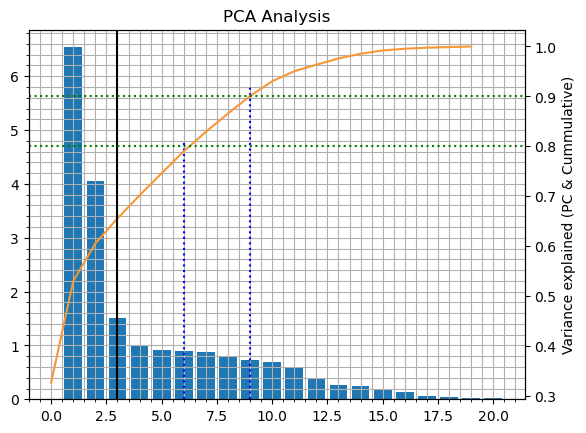

explained_variance_ratio: [0.33 0.2  0.08 0.05 0.05 0.04 0.04 0.04 0.04 0.04 0.03 0.02 0.01 0.01
 0.01 0.01 0.   0.   0.   0.  ]


In [393]:
pev = pca_matrix.explained_variance_
pevr = pca_matrix.explained_variance_ratio_
cumpevr = np.cumsum(pevr)

print(f"Cummulative explained variance ratio=",  cumpevr)

dimensions = list(range(1, len(pev)+1))
fig, ax1 = plt.subplots()
ax1.bar(x=dimensions, height=pev)
ax2 = ax1.twinx() 
ax2.plot(cumpevr, color='#F79737')

ax1.axvline(x=6.0, color="blue", linestyle="dotted", ymax=0.7)
ax1.axvline(x=9.0, color="blue", linestyle="dotted", ymax=0.85)
ax2.axvline(x=3.0, color='black', linestyle="solid")
ax2.axhline(y=0.90, color='green', linestyle="dotted")
ax2.axhline(y=0.80, color='green', linestyle="dotted")

ax1.grid(which = "both")
ax1.minorticks_on()
plt.title('PCA Analysis')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance explained (PC & Cummulative)')
plt.show()
print(f'explained_variance_ratio: {np.round(pevr,2)}')

<Axes: >

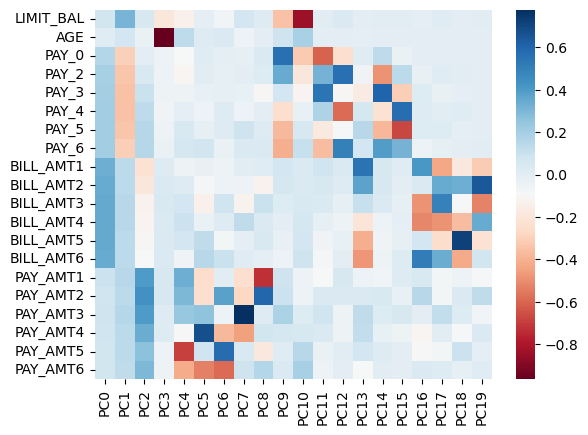

In [326]:
#Understanding How Features Contribute to PCs
loadings = pd.DataFrame(pca_matrix.components_.T,
columns=['PC%s' % _ for _ in range(len(working_df.columns))],
index=working_df.columns)
sns.heatmap(loadings,cmap="RdBu")
#print(loadings)

In [344]:
#Add target variable back to the PCA dataset and determine the distribution of the target data

target = pd.Series(default['default.payment.next.month'], name='default.payment')

#convert the pca matrix with principal components to a dataframe
x_pca = pca_matrix.fit_transform(working_df)

pca_df= pd.DataFrame(x_pca,columns=['PC%s' % _ for _ in range(len(working_df.columns))])
result_df = pd.concat([pca_df, target], axis=1)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PC0              30000 non-null  float64
 1   PC1              30000 non-null  float64
 2   PC2              30000 non-null  float64
 3   PC3              30000 non-null  float64
 4   PC4              30000 non-null  float64
 5   PC5              30000 non-null  float64
 6   PC6              30000 non-null  float64
 7   PC7              30000 non-null  float64
 8   PC8              30000 non-null  float64
 9   PC9              30000 non-null  float64
 10  PC10             30000 non-null  float64
 11  PC11             30000 non-null  float64
 12  PC12             30000 non-null  float64
 13  PC13             30000 non-null  float64
 14  PC14             30000 non-null  float64
 15  PC15             30000 non-null  float64
 16  PC16             30000 non-null  float64
 17  PC17        

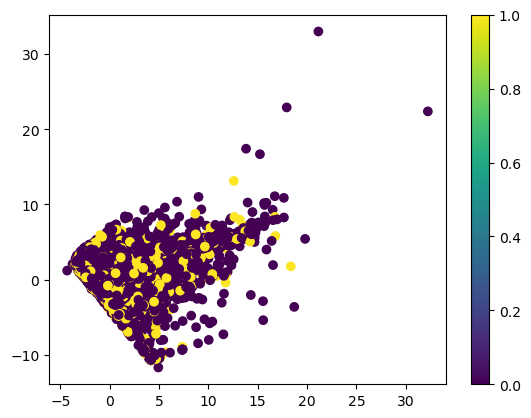

In [350]:
#visualize the data in 2D
plt.scatter(x=result_df['PC0'], y=result_df['PC1'],c=result_df['default.payment'])
plt.colorbar()

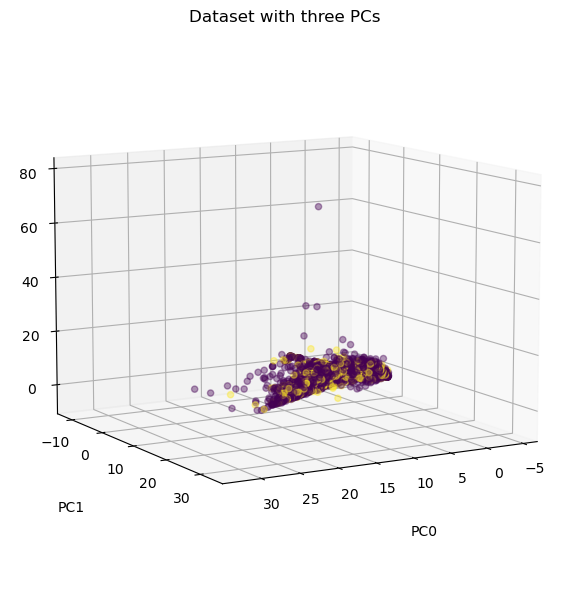

In [361]:
#visualize the data in 3D

plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(result_df['PC0'], result_df['PC1'], result_df['PC2'], c = result_df['default.payment'], alpha = 0.4)
ax.set_xlabel('PC0', labelpad = 20)
ax.set_ylabel('PC1', labelpad = 20)
ax.set_zlabel('PC2', labelpad = 20)
ax.view_init(10, 60)
plt.title('Dataset with three PCs')
plt.tight_layout();